# **PROJECT 02 - PREDICTING AGE & GENDER FROM IMAGES USING A CONVOLUTIONAL NEURAL NETWORK] IN PYTHON!**


## **Overview**

Cognitive computing is the use of computers to perform tasks that previously could only be performed by the human mind. In this project, we will develop a complete cognitive computing system that can predict the self-reported age and gender of a person based on a photograph of the person’s face – a task that could previously only be done by human beings. The capability to automatically identify people’s ages and genders from visual images could be applied in a very wide array of business scenarios, including security, the sale of age-restricted products, studying customer patronage and purchasing behavior, etc..

## **Project**

###**Data**

The data for this project have been provided to you on the course website in the form of a comma-separated values (CSV) file contained inside of a ZIP file. we will upload the ZIP file to our Colab notebook’s local session storage and then run the code below to extract the CSV file:

//import the shutil library//
import shutil//
extract the CSV file from the ZIP file//
shutil.unpack_archive('Project 02 - Data.zip')

The dataset has a total of 10,000 rows, each of which contains information about one person. The person’s age (ranging from 1 to 116 years) and self-reported gender (0 = female, 1 = male) have been provided for 8,000 of the cases, while these details have not been provided for the remaining 2,000 cases. By contrast, we have been provided a vector containing 2,304 grayscale pixel values for all 10,000 of the cases in the dataset. Each of these vectors represents a 48 pixel x 48 pixel grayscale photograph of the corresponding person’s face. we will need to use the 8,000 rows for which you have complete information to train one or more convolutional neural networks (CNNs) that can use the image data to predict each person’s age and gender. After training our CNN model(s), we will then use the model(s) to predict the age and gender for the remaining 2,000 cases.
we may use the following Python code to load and divide the data into two Pandas dataframes – one of which contains only the 2,000 cases for which we need to make predictions, and the other of which contains the other 8,000 cases for which you have been given complete information:

import pandas as pd//
#load the CSV file into a pandas dataframe//
df = pd.read_csv('Project 02 - Data.csv')//
#convert the pixel strings into numpy arrays//
pixels = []//
for p in df.pixels://
pixels.append(np.fromstring(p, sep=' '))//
df['pixels'] = pixels//
pixels = None #release memory//
perform your data cleaning / preparation tasks here //
create a dataframe containing only those rows for which//
age & gender predictions need to be made//
df_predict = df[pd.isnull(df.age) == True].copy()//
remove all incomplete rows from the 'df' dataframe//
df = df[pd.isnull(df.age) == False].copy()//


###**Predicting Age & Gender**

For this project, we are trying to predict the age and gender of a person based on a small grayscale photograph of the person’s face. The project therefore involves both a classification task (predicting gender) and a numerical prediction task (predicting age). We will need to consider these tasks when designing the architecture of our convolutional neural network(s). For example, we may want to use a binary_crossentropy loss function with an accuracy performance metric when attempting to predict the categorical gender labels, while using a different loss function and performance metric when attempting to predict the numerical age labels. More information about loss functions can be found here: https://keras.io/api/losses/, and more information about performance metrics can be found here: https://keras.io/api/metrics/
Before training your convolutional neural network(s), we will need to properly prepare the image vectors so that they can be used as input. As noted previously, each vector (array) contains 2,304 elements, each of which represents a grayscale pixel intensity value for a 48 pixel x 48 pixel image. we will therefore need to reshape each one-dimensional array into a two-dimensional array of size (48, 48) before training your neural network(s). Numpy’s reshape() function may be useful for performing this task. See the following page for more details: https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

## **TASKS**
1. Create a new notebook on Google Colab and upload the ZIP data file for this project to our notebook’s session storage. The ZIP file is available on the course website.
2. Extract the CSV data file from the ZIP file. The CSV file is named “Project 02 – Data.csv”.
3. Load all of the data into a pandas dataframe and perform whatever cleaning, preprocessing, or feature engineering tasks we deem necessary in order to prepare the data for use by a convolutional neural network.
4. Extract the 2,000 rows from the dataframe for which we will eventually need to make predictions and store those data in a separate dataframe.
5. Split our primary data into training and testing sets so that we will be able to evaluate the performance of our CNN models on out-of-sample data. Alternatively, we may consider using cross validation.
6. Train and test a variety of CNN models (i.e., models with varying architectures and training parameters). Be sure to keep track of the performance of each model. Remember: our goal is to train models that can predict age and gender as accurately as possible.
7. Once we have trained our final CNN model(s), use the model(s) to predict age and gender for the 2,000 cases in our prediction dataframe.
To ensure that we receive credit for this project, please submit the CSV file containing our predictions by using the Project 02 link in the Assignments section of the course website.
8. Save all of our predictions as a comma-separated values (CSV) file. Note the following:
a. The file should be named “Last name, First name.csv”. For example, Dr. Soper’s CSV file would be named “Soper, Daniel.csv”.
b. Each line of our CSV file should contain the ID of the person whose age and gender are being predicted, followed by a comma, followed by the predicted age, followed by a comma, followed by the predicted gender label. Here’s an example depicting predictions for five people:
id,age,gender
10001,47.0,1.0
10002,48.0,1.0
10003,23.0,1.0
10004,87.0,0.0
10005,23.0,0.0
c. our CSV file should contain exactly 2,000 predictions – one for person for which the age and gender labels were not provided.
d. we can easily write our predictions to a CSV file in Python by using code similar to the following. This code assumes that we are storing our predictions in a dataframe named “df_predict”.
e. If we like, we may validate our predictions CSV file before submitting it for grading by using the Google Colab notebook entitled “Validate CSV Predictions File - Notebook.ipynb”, which is available on the course website. This notebook will check whether our CSV file conforms to the expectations described above.

## **Deliverables**
To ensure that we receive credit for this project, please submit the CSV file containing our predictions by using the Project 02 link in the Assignments section of the course website.

## **Evaluation Criteria**
The age and gender predictions that we submit in our CSV file will be compared to the true age and gender values in order to determine the overall accuracy of our predictions. For our age predictions, accuracy will be calculated as the mean absolute error from the true values. For our gender predictions, accuracy will be calculated as the proportion of the true gender labels that we predicted correctly.  overall predictive accuracy will be used as a basis for assigning a grade for this project, with greater accuracy yielding a higher score.

##**Installing required packages**
All the required packages for executing the project are installed below.

In [182]:
!pip install tensorflow-addons
#import the shutil library
import shutil
#import the pandas library
import pandas as pd
#import the numpy library
import numpy as np
import tensorflow as tf
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, LeakyReLU
from keras.models import Sequential
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator 
import os
import tensorflow_addons
import cv2
from tqdm import tqdm
import random
import math

##**Read Data**
Read the tweet data from zip file.


In [183]:
#extract the CSV file from the ZIP file
shutil.unpack_archive('Project 02 - Data.zip')

In [184]:
#load the CSV file into a pandas dataframe
df = pd.read_csv('Project 02 - Data.csv')
#convert the pixel strings into numpy arrays
#pixels = []
#for p in df.pixels:
#  pixels.append(np.fromstring(p, sep=' '))
#df['pixels'] = pixels
#pixels = None #release memory

In [185]:
df.head()

,id,age,gender,pixels
0,1,47.0,1.0,217 222 219 225 187 113 85 73 82 73 71 75 105 ...
1,2,48.0,1.0,121 101 123 149 165 180 183 179 179 178 180 18...
2,3,23.0,1.0,100 105 109 107 109 157 182 190 197 201 202 20...
3,4,87.0,0.0,229 239 239 241 239 238 237 239 237 235 223 20...
4,5,23.0,0.0,30 33 32 29 38 42 36 35 45 67 145 178 191 197 ...


In [186]:
len(df.pixels[0])

8690

In [187]:
df.dtypes

id          int64
age       float64
gender    float64
pixels     object
dtype: object

In [188]:
print('Total rows: {}'.format(len(df)))
print('Total columns: {}'.format(len(df.columns)))

Total rows: 10000
Total columns: 4


In [189]:
df.describe()

,id,age,gender
count,10000.00000,8000.000000,8000.000000
mean,5000.50000,33.371625,0.526625
std,2886.89568,19.858426,0.499322
min,1.00000,1.000000,0.000000
25%,2500.75000,23.000000,0.000000
50%,5000.50000,29.000000,1.000000
75%,7500.25000,45.000000,1.000000
max,10000.00000,116.000000,1.000000


In [190]:
df.isnull().sum()

id           0
age       2000
gender    2000
pixels       0
dtype: int64

In [191]:
## normalizing pixels data

## calculating distributions
age_dist = df['age'].value_counts()
gender_dist = df['gender'].value_counts().rename(index={0:'Female',1:'Male'})

def ditribution_plot(x,y,name):
    fig = go.Figure([
        go.Bar(x=x, y=y)
    ])

    fig.update_layout(title_text=name)
    fig.show()

In [192]:
ditribution_plot(x=age_dist.index, y=age_dist.values, name='Age Distribution')

In [193]:
ditribution_plot(x=gender_dist.index, y=gender_dist.values, name='Gender Distribution')

In [194]:
#create a dataframe containing only those rows for which
#age & gender predictions need to be made
df_predict = df[pd.isnull(df.age) == True].copy()
#remove all incomplete rows from the 'df' dataframe
df = df[pd.isnull(df.age) == False].copy()

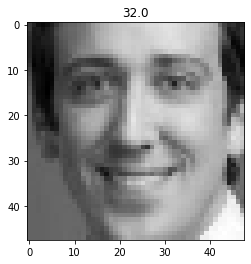

In [195]:
index = 100
image = np.fromstring(df['pixels'][index], sep = ' ', dtype = np.uint8).reshape((48,48))
plt.title(df['age'][index])
plt.imshow(image, cmap ="gray")
plt.show()

In [196]:
class CustomDataGen(tf.keras.utils.Sequence):
    
    def __init__(self, df,
                 batch_size = 32,
                 input_size=(48, 48, 3),
                 shuffle=True,
                 data_augmentation = False):
        self.df = df
        self.batch_size = batch_size
        self.input_size = input_size
        self.data_augmentation = data_augmentation
        self.var = 1
        
        self.imageGenerator = ImageDataGenerator(
            horizontal_flip = True,
            #vertical_flip = True,
            fill_mode = 'nearest',
            zoom_range = (1, 1.1),
            width_shift_range = 0.1,
            height_shift_range = 0.1,
            rotation_range = 10
        )
        
        self.images = []
        self.age_labels = []        
        self.gender_labels = []
        
        for index, row in tqdm(df.iterrows()):
            image = np.fromstring(row['pixels'], sep = ' ', dtype = np.uint8).reshape((48,48))
            image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
            
            self.images.append(image)
            
            self.age_labels.append(row['age'])
            self.gender_labels.append(row['gender'])
            
            
        self.images = np.array(self.images)
        self.age_labels = np.array(self.age_labels).astype(np.float32)
        self.gender_labels = np.array(self.gender_labels).astype(np.float32)
        
        p = np.random.permutation(len(self.age_labels))
        self.images = self.images[p]
        self.age_labels = self.age_labels[p]
        self.gender_labels = self.gender_labels[p]
        
        self.n = len(self.df)
        
    
    def __getitem__(self, index):
        images = []
        
        for i in range(self.batch_size):
            image = self.images[index * self.batch_size + i]
            
            if self.data_augmentation:                
                image = self.imageGenerator.random_transform(image)
                
            images.append(image)
            
        s = slice(self.batch_size * index, (index + 1) * self.batch_size)
        return np.array(images), (self.age_labels[s], self.gender_labels[s])
    
    def __len__(self):
            
        return self.n // self.batch_size
    
    def on_epoch_end(self):
        
        #Random permutation
        p = np.random.permutation(len(self.age_labels))
        self.images = self.images[p]
        self.age_labels = self.age_labels[p]
        self.gender_labels = self.gender_labels[p]

In [197]:
#Divide into train and validation
msk = np.random.rand(len(df)) < 0.95
train = df[msk]
val = df[~msk]

train_dataset = CustomDataGen(train, data_augmentation = True)
val_dataset = CustomDataGen(val)

7573it [00:02, 3034.13it/s]
427it [00:00, 3079.73it/s]


In [198]:
def build_model(input_shape = (48,48,3)):
    
    i = tf.keras.layers.Input(input_shape, dtype = tf.uint8)
    x = tf.cast(i, tf.float32)
    x = tf.keras.applications.vgg16.preprocess_input(x)
    
    backbone = tf.keras.applications.vgg16.VGG16(
                include_top=False, weights='imagenet',
                input_tensor=x
            )
    output_layer = backbone.get_layer("block5_conv3").output    
    
    
    def build_age_branch(input_tensor): 
        x = tf.keras.layers.Dense(1024, activation = LeakyReLU(alpha=0.3))(input_tensor)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Dropout(0.2)(x)
        x = tf.keras.layers.Dense(1, activation = None, name = 'age_output')(x)
    
        return x
    
    def build_gender_branch(input_tensor): 
        x = tf.keras.layers.Dense(500, activation = LeakyReLU(alpha=0.3))(input_tensor)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Dropout(0.2)(x)
        x = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'gender_output')(x)
    
        return x
    
    x = tf.keras.layers.Flatten()(output_layer)       
    output_age = build_age_branch(x)
    output_gender = build_gender_branch(x)
    model = tf.keras.Model(i, [output_age, output_gender])
    
    return model

In [199]:
model = build_model()
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 tf.cast_8 (TFOpLambda)         (None, 48, 48, 3)    0           ['input_9[0][0]']                
                                                                                                  
 tf.__operators__.getitem_8 (Sl  (None, 48, 48, 3)   0           ['tf.cast_8[0][0]']              
 icingOpLambda)                                                                                   
                                                                                                  
 tf.nn.bias_add_8 (TFOpLambda)  (None, 48, 48, 3)    0           ['tf.__operators__.getitem_

Epoch 1/70
236/236 [==============================] - 223s 938ms/step - loss: 1.5199 - age_output_loss: 1289.0310 - gender_output_loss: 0.4617 - age_output_mean_absolute_error: 33.0165 - gender_output_accuracy: 0.7965 - val_loss: 1.6521 - val_age_output_loss: 960.0353 - val_gender_output_loss: 1.3841 - val_age_output_mean_absolute_error: 28.2615 - val_gender_output_accuracy: 0.6779 - lr: 1.0000e-04
Epoch 2/70
236/236 [==============================] - 254s 1s/step - loss: 1.3281 - age_output_loss: 1152.2263 - gender_output_loss: 0.3518 - age_output_mean_absolute_error: 31.8763 - gender_output_accuracy: 0.8595 - val_loss: 0.8344 - val_age_output_loss: 694.4784 - val_gender_output_loss: 0.2799 - val_age_output_mean_absolute_error: 24.6546 - val_gender_output_accuracy: 0.8750 - lr: 1.0000e-04
Epoch 3/70
236/236 [==============================] - 260s 1s/step - loss: 1.1842 - age_output_loss: 1034.4163 - gender_output_loss: 0.2996 - age_output_mean_absolute_error: 30.1636 - gender_output_a

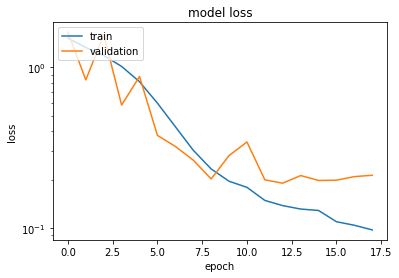

In [200]:
EPOCHS = 70
BATCH_SIZE = 32
model.compile(tf.keras.optimizers.Adam(learning_rate=1e-4), loss = ['mse','binary_crossentropy'], loss_weights = [0.001,0.5], 
              metrics = {'age_output': 'mean_absolute_error', 'gender_output': 'accuracy'})

plateau = tf.keras.callbacks.ReduceLROnPlateau(
      monitor='val_loss', factor=0.3, patience=2, verbose = 1
)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,
                                      patience=5)  # Early stopping (stops training when validation doesn't improve for {patience} epochs)
save_best = tf.keras.callbacks.ModelCheckpoint('weights.h5', monitor='val_loss', save_best_only=True,
                                            mode='min', save_weights_only = True)  # Saves the best version of the model to disk (as measured on the validation data set)
remote_monitor_callback = tf.keras.callbacks.RemoteMonitor(
    root='https://dweet.io', path='/dweet/for/multitask',
    send_as_json=False, field = 'data'
)     

history = model.fit(train_dataset,
            epochs=EPOCHS,
            batch_size = BATCH_SIZE,
            validation_data=val_dataset,
            callbacks = [es, save_best, plateau, remote_monitor_callback])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.yscale('log')
plt.show()

In [201]:
model.evaluate(val_dataset)

13/13 [==============================] - 3s 221ms/step - loss: 0.2122 - age_output_loss: 70.8318 - gender_output_loss: 0.2828 - age_output_mean_absolute_error: 6.1777 - gender_output_accuracy: 0.9062


[0.2122274488210678,
 70.83180236816406,
 0.2827913165092468,
 6.17769193649292,
 0.90625]

C:\Users\tejaa\AppData\Local\Temp/ipykernel_12532/2509835192.py:7: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



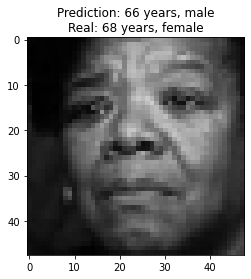

In [222]:
images, labels = val_dataset[1]
index = 0

p = model.predict(images)

gender_predictions = tf.where(p[1] > 0.5, 1, 0)
plt.title(f'Prediction: {p[0][index].astype(np.int)[0]} years, {name_genders[gender_predictions[index][0]]}\n'+
         f'Real: {int(labels[0][index])} years, {name_genders[int(labels[1][index])]}')
plt.imshow(images[index])
plt.show()

In [219]:
df_predict.head()

,id,age,gender,pixels
8000,8001,NaN,NaN,107 11 51 120 10 22 31 38 43 49 58 68 77 92 11...
8001,8002,NaN,NaN,54 66 80 130 157 154 151 152 154 152 139 135 1...
8002,8003,NaN,NaN,50 67 70 112 157 218 228 222 212 201 211 203 1...
8003,8004,NaN,NaN,238 247 249 236 80 31 20 26 32 73 96 112 116 1...
8004,8005,NaN,NaN,36 37 41 40 37 37 40 44 52 55 50 67 78 91 100 ...


In [220]:
val_1 = CustomDataGen(df_predict)

2000it [00:00, 2846.74it/s]


In [221]:
len(val_1.images)

2000

In [214]:
p = model.predict(val_1)

In [225]:

images = val_1.images


In [226]:
p = model.predict(images)

In [229]:
p[0]

array([[32.005707],
       [83.855255],
       [28.085585],
       ...,
       [18.305197],
       [45.43101 ],
       [51.583984]], dtype=float32)

In [259]:
 df_final2 = pd. DataFrame(p[0],columns=['age'])

In [260]:
df_final2.head()

,age
0,32.005707
1,83.855255
2,28.085585
3,36.078434
4,25.208870


In [261]:
 df_final3 = pd. DataFrame(p[1],columns=['gender'])

In [262]:
 df_final3.head()

,gender
0,0.020467
1,0.999635
2,0.001718
3,0.008299
4,0.998177


In [256]:
p[1]

array([[0.02046719],
       [0.99963486],
       [0.0017181 ],
       ...,
       [0.05392474],
       [0.99859595],
       [0.99533373]], dtype=float32)

In [263]:
df_final2.to_csv('age.csv')
df_final3.to_csv('gender.csv')

In [267]:
df_predict.head()

,id,age,gender,pixels
8000,8001,NaN,NaN,107 11 51 120 10 22 31 38 43 49 58 68 77 92 11...
8001,8002,NaN,NaN,54 66 80 130 157 154 151 152 154 152 139 135 1...
8002,8003,NaN,NaN,50 67 70 112 157 218 228 222 212 201 211 203 1...
8003,8004,NaN,NaN,238 247 249 236 80 31 20 26 32 73 96 112 116 1...
8004,8005,NaN,NaN,36 37 41 40 37 37 40 44 52 55 50 67 78 91 100 ...


## End of Lab Assignment 04!